In [10]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(42)

In [11]:
class Bandit:
    def __init__(self, num_arms, initial_radius=2):
        self.num_arms = num_arms
        self.arm_means = np.random.uniform(-initial_radius, initial_radius, self.num_arms)
    
    def pull_arm(self, arm : int):
        return np.random.normal(self.arm_means[arm], 1)

    def shuffle(self, sd=0.01):
        increment = np.random.normal(0, sd, self.num_arms)
        self.arm_means += increment

myBandit = Bandit(5)
myBandit.arm_means

array([ 1.03607513,  0.72725448, -0.18911761,  1.5427961 , -0.82204304])

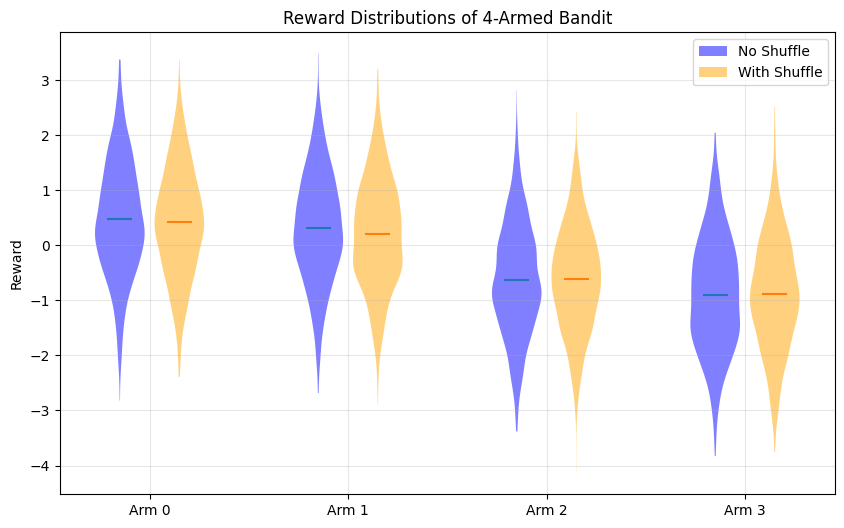

In [12]:
from matplotlib.patches import Patch

bandit = Bandit(num_arms=4, initial_radius=1)
num_pulls = 1000

# rewards no shuffle
rewards_no_shuffling = []
for arm in range(bandit.num_arms):
    rewards_no_shuffling.append([bandit.pull_arm(arm) for _ in range(num_pulls)])

# rewards with shuffle
rewards_with_shuffling = []
for arm in range(bandit.num_arms):
    rewards_with_shuffling.append([bandit.pull_arm(arm) for _ in range(num_pulls)])
    bandit.shuffle()

fig, ax = plt.subplots(figsize=(10, 6))
positions = np.arange(1, bandit.num_arms + 1)

# no shuffle
parts1 = ax.violinplot(rewards_no_shuffling, positions=positions - 0.15, widths=0.25,
                       showmeans=True, showextrema=False, showmedians=False)

# with shuffle
parts2 = ax.violinplot(rewards_with_shuffling, positions=positions + 0.15, widths=0.25,
                       showmeans=True, showextrema=False, showmedians=False)

for pc in parts1['bodies']:
    pc.set_facecolor('blue')
    pc.set_alpha(0.5)
for pc in parts2['bodies']:
    pc.set_facecolor('orange')
    pc.set_alpha(0.5)

# legend
legend_elements = [
    Patch(facecolor='blue', alpha=0.5, label='No Shuffle'),
    Patch(facecolor='orange', alpha=0.5, label='With Shuffle')
]
ax.legend(handles=legend_elements, loc='upper right')

# labels
ax.set_xticks(positions)
ax.set_xticklabels([f"Arm {i}" for i in range(bandit.num_arms)])
ax.set_ylabel("Reward")
ax.set_title(f"Reward Distributions of {bandit.num_arms}-Armed Bandit")
ax.grid(alpha=0.3)

In [13]:
class RandomWalkBandit:
    def __init__(self, num_arms = 10):
        self.num_arms = num_arms
        self.arm_means = np.zeros(self.num_arms)
        
    def pull_arm(self, arm: int):
        return np.random.normal(self.arm_means[arm],1.0)
    
    def random_walk_step(self, std = .01):
        increments = np.random.normal(0, std, self.num_arms)
        self.arm_means += increments

In [ ]:
class EpsilonGreedy:
    def __init__(self, num_arms, epsilon=0.1, alpha=None):  
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.alpha = alpha
        self.Q = np.zeros(num_arms) 
        self.counts = np.zeros(num_arms)
        
    def explore_or_exploit(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.Q)
    
    def update(self, action, reward):
        self.counts[action] += 1
        if self.alpha is None:
            step_size = 1.0 / self.counts[action] 
            
        else:
            step_size = self.alpha
        
        self.Q[action] += step_size * (reward - self.Q[action])

In [ ]:
runs = 500
steps = 10000
avg_rewards = []
step_rewards = []
avg_best = []
step_best = []

for run in range(runs):
    bandit = RandomWalkBandit(10)
    a1 = EpsilonGreedy(10, epsilon=.1, alpha=None)
    a2 = EpsilonGreedy(10, epsilon=.1, alpha=.1)  
    rewards1 = []
    rewards2 = []
    optimal1 = []
    optimal2 = []
    
    for step in range(steps):
        bandit.random_walk_step()
        best_action = np.argmax(bandit.arm_means) 
    
        firstact = a1.explore_or_exploit()
        firstreward = bandit.pull_arm(firstact)
        a1.update(firstact, firstreward)
        rewards1.append(firstreward)
        optimal1.append(firstact == best_action)

        secondact = a2.explore_or_exploit()
        secondreward = bandit.pull_arm(secondact)
        a2.update(secondact, secondreward)
        rewards2.append(secondreward)
        optimal2.append(secondact == best_action)
    
    avg_rewards.append(rewards1)     
    step_rewards.append(rewards2)    
    avg_best.append(optimal1)        
    step_best.append(optimal2)     

avg_rewards = np.array(avg_rewards)
step_rewards = np.array(step_rewards)
avg_best = np.array(avg_best)
step_best = np.array(step_best)

running_avg_rewards1 = np.cumsum(avg_rewards, axis=1) / np.arange(1, steps + 1)
running_avg_rewards2 = np.cumsum(step_rewards, axis=1) / np.arange(1, steps + 1)
running_avg_best1 = np.cumsum(avg_best, axis=1) / np.arange(1, steps + 1)
running_avg_best2 = np.cumsum(step_best, axis=1) / np.arange(1, steps + 1)


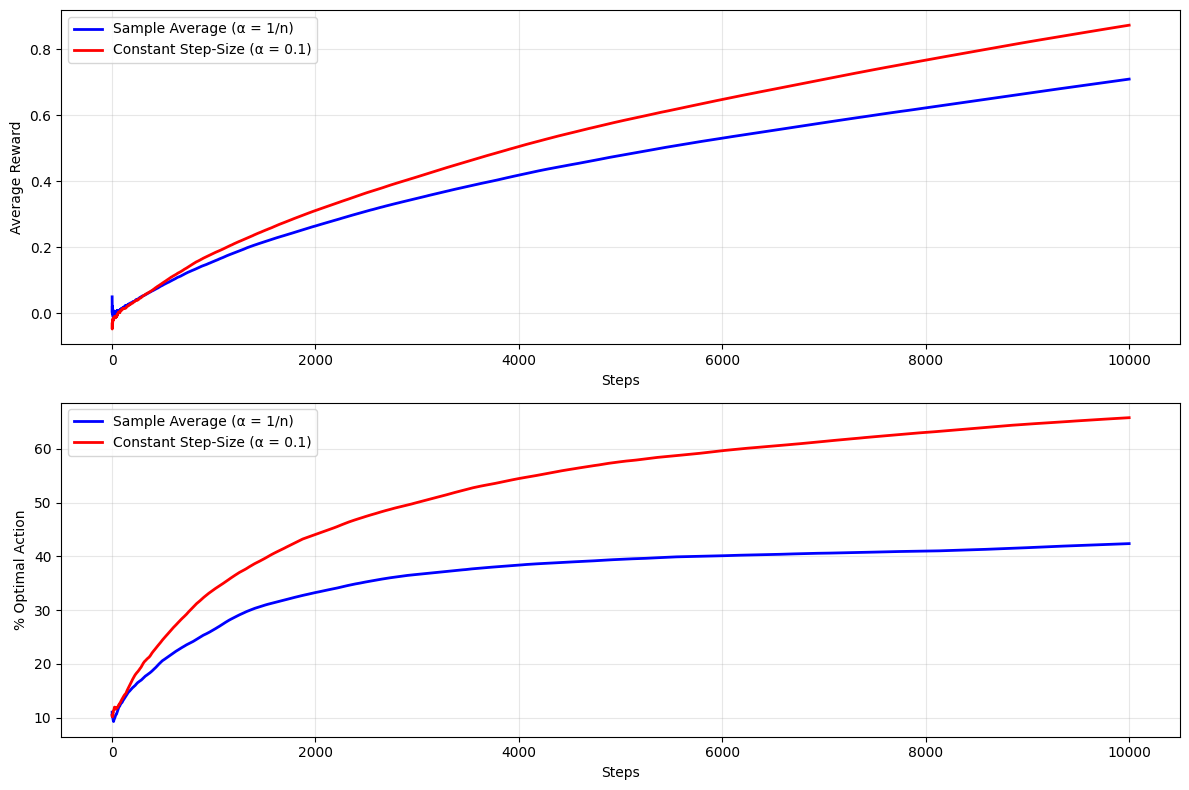

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

steps_range = np.arange(1, steps + 1)

ax1.plot(steps_range, np.mean(running_avg_rewards1, axis=0), label='Sample Average (α = 1/n)', color='blue', linewidth=2)
ax1.plot(steps_range, np.mean(running_avg_rewards2, axis=0), label='Constant Step-Size (α = 0.1)', color='red', linewidth=2)
ax1.set_xlabel('Steps')
ax1.set_ylabel('Average Reward')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(steps_range, np.mean(running_avg_best1, axis=0) * 100, label='Sample Average (α = 1/n)', color='blue', linewidth=2)
ax2.plot(steps_range, np.mean(running_avg_best2, axis=0) * 100, label='Constant Step-Size (α = 0.1)', color='red', linewidth=2)
ax2.set_xlabel('Steps')
ax2.set_ylabel('% Optimal Action')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
runs = 10
steps = 200000
epsilon_values = [0, 0.01, 0.1]
alpha_values = [0.1, 0.5, 1.0]

results = {}

for eps in epsilon_values:
    for alpha in alpha_values:
        key = f"eps_{eps}_alpha_{alpha}"
        run_means = []
        
        for run in range(runs):
            bandit = RandomWalkBandit(10)
            agent = EpsilonGreedy(10, epsilon=eps, alpha=alpha)
            rewards = []
            
            for step in range(steps):
                bandit.random_walk_step()
                action = agent.explore_or_exploit()
                reward = bandit.pull_arm(action)
                agent.update(action, reward)
                rewards.append(reward)
            
            avg_reward_last_100k = np.mean(rewards[-100000:])
            run_means.append(avg_reward_last_100k)
        
        results[key] = np.mean(run_means)


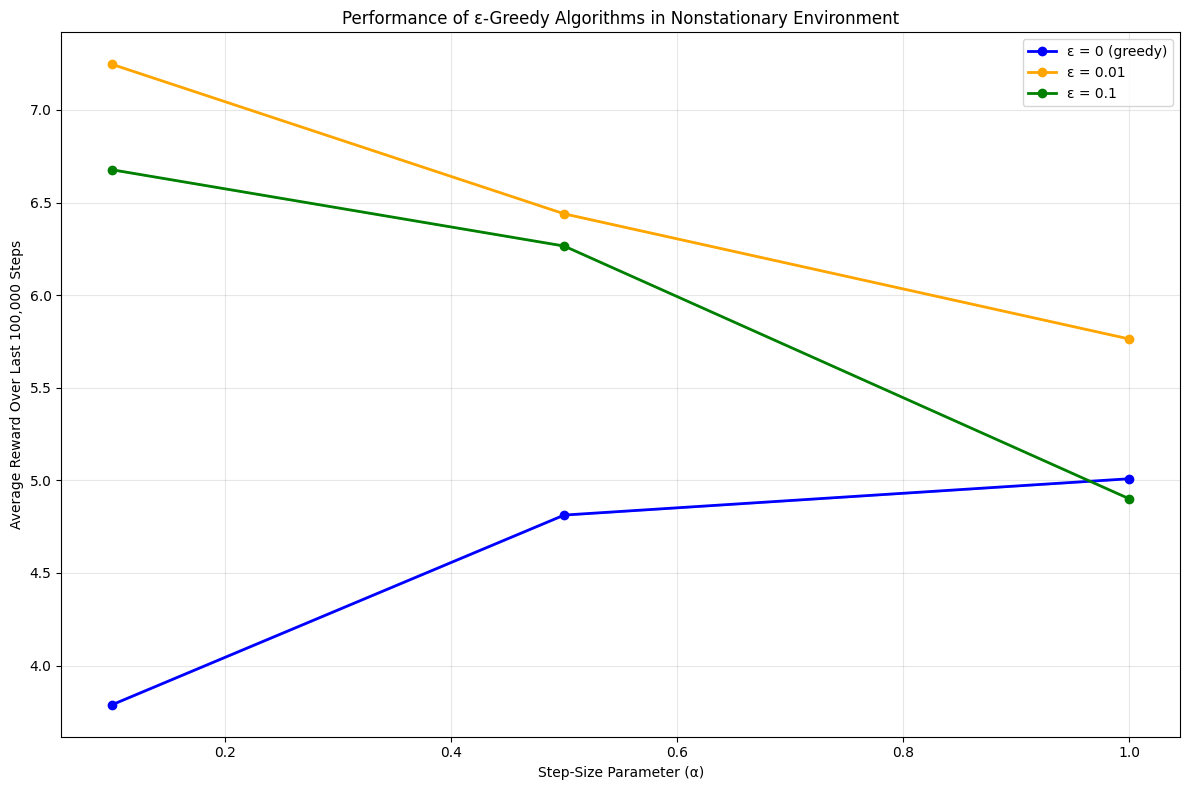

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['blue', 'orange', 'green']
labels = ['ε = 0 (greedy)', 'ε = 0.01', 'ε = 0.1']

for i, eps in enumerate(epsilon_values):
    means = []
    stds = []
    
    for alpha in alpha_values:
        key = f"eps_{eps}_alpha_{alpha}"
        data = results[key]
        means.append(np.mean(data))
        stds.append(np.std(data))
    
    ax.plot(alpha_values, means, 
            color=colors[i], linewidth=2, marker='o', 
            label=labels[i])
    ax.fill_between(alpha_values, 
                    np.array(means) - np.array(stds),
                    np.array(means) + np.array(stds),
                    color=colors[i], alpha=0.2)

ax.set_xlabel('Step-Size Parameter)')
ax.set_ylabel('Average Reward Over Last 100,000 Steps')
ax.set_title('Performance of ε-Greedy Algorithms in Nonstationary Environment')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
